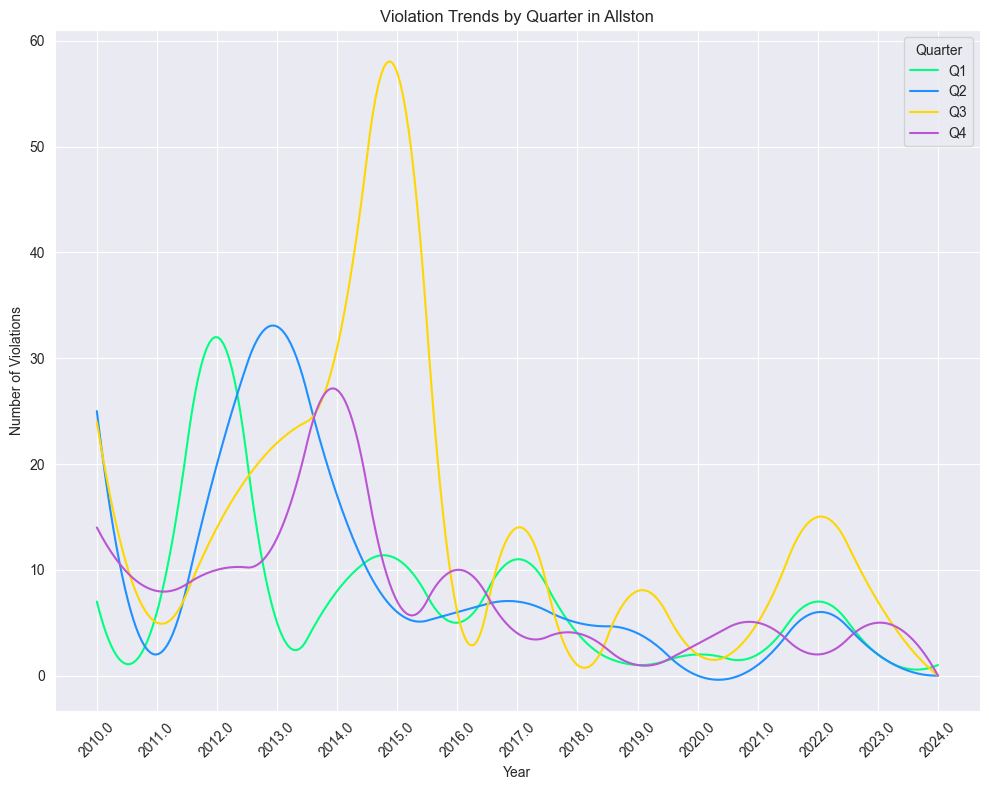

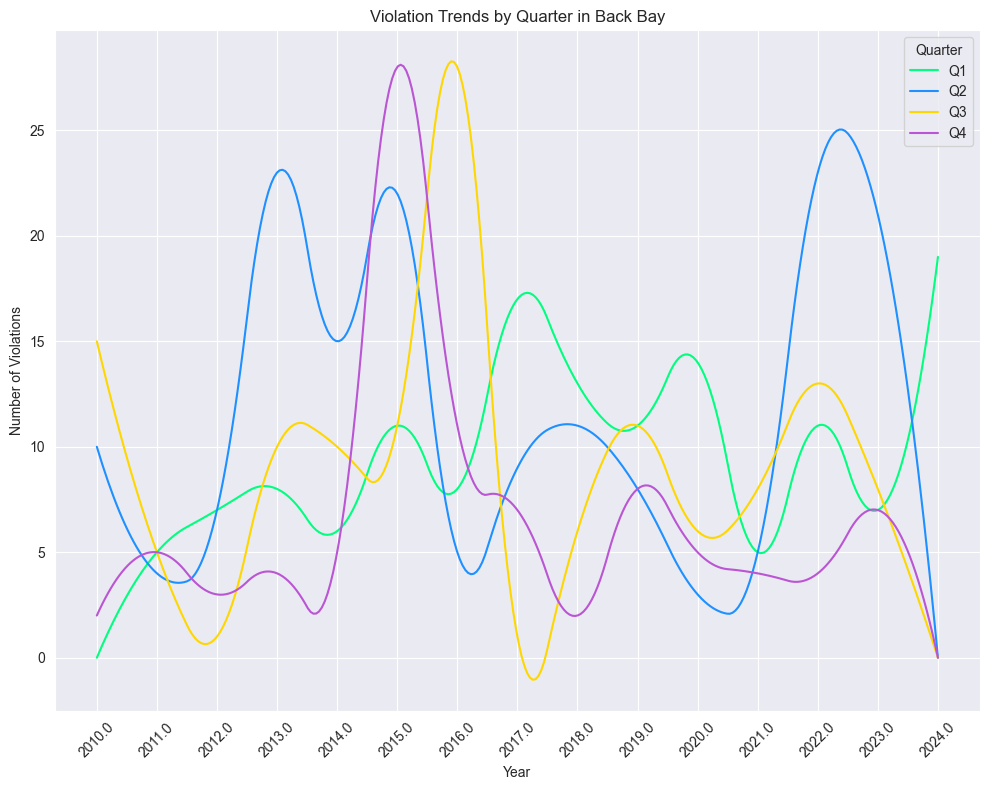

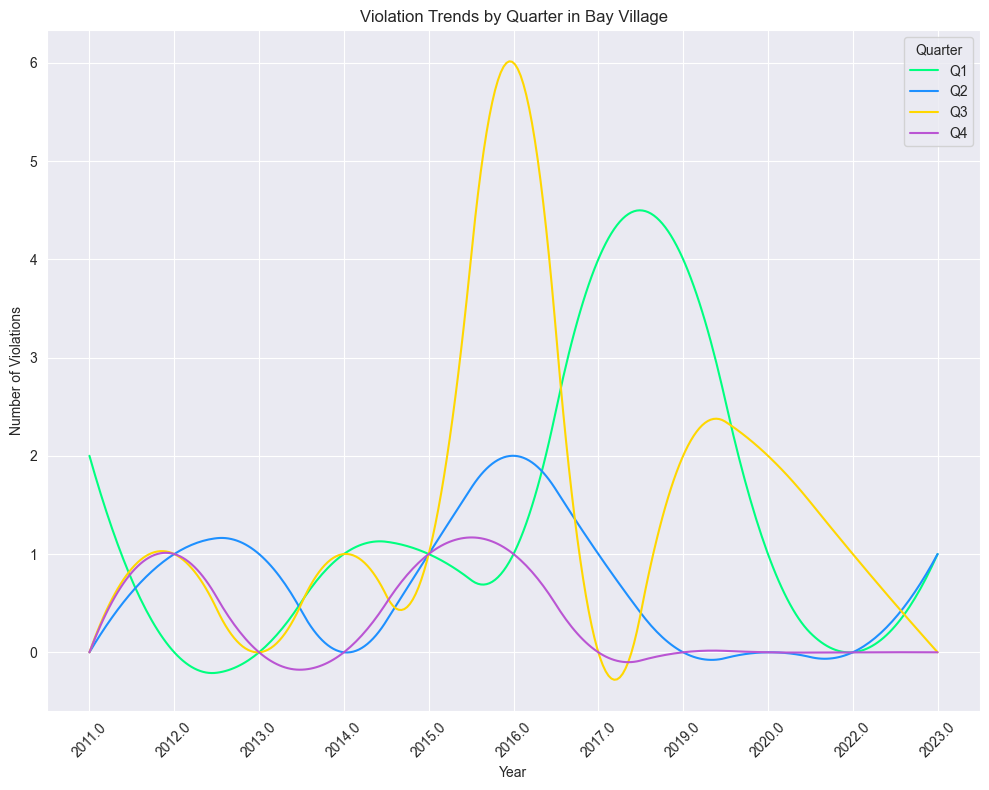

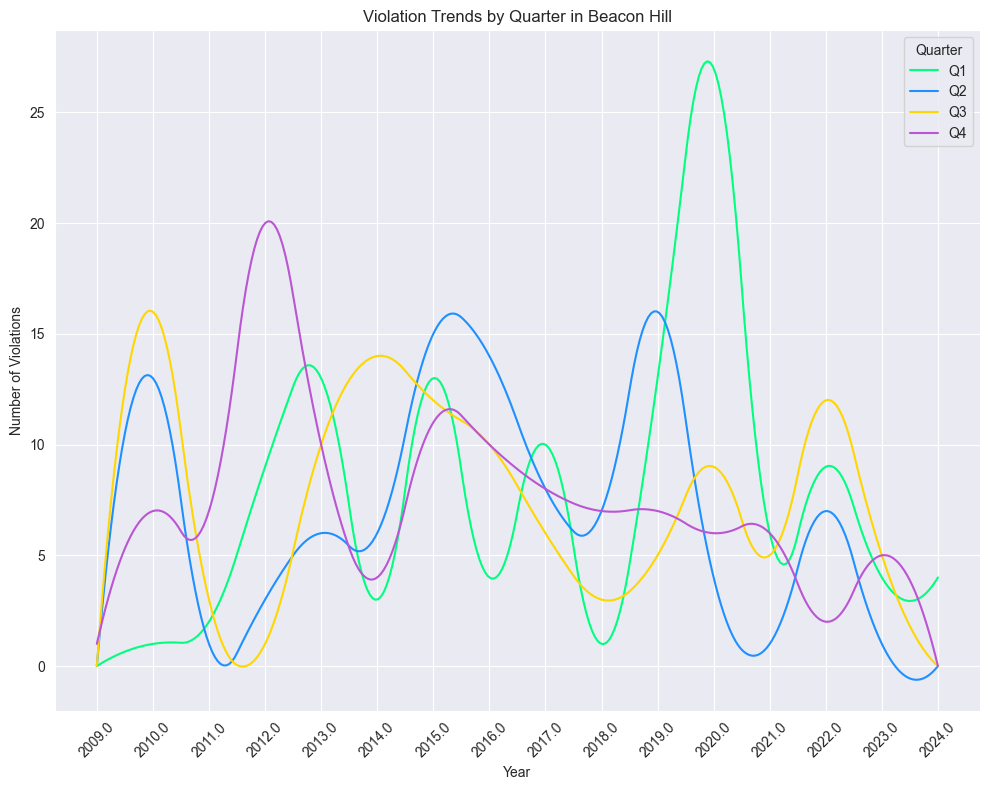

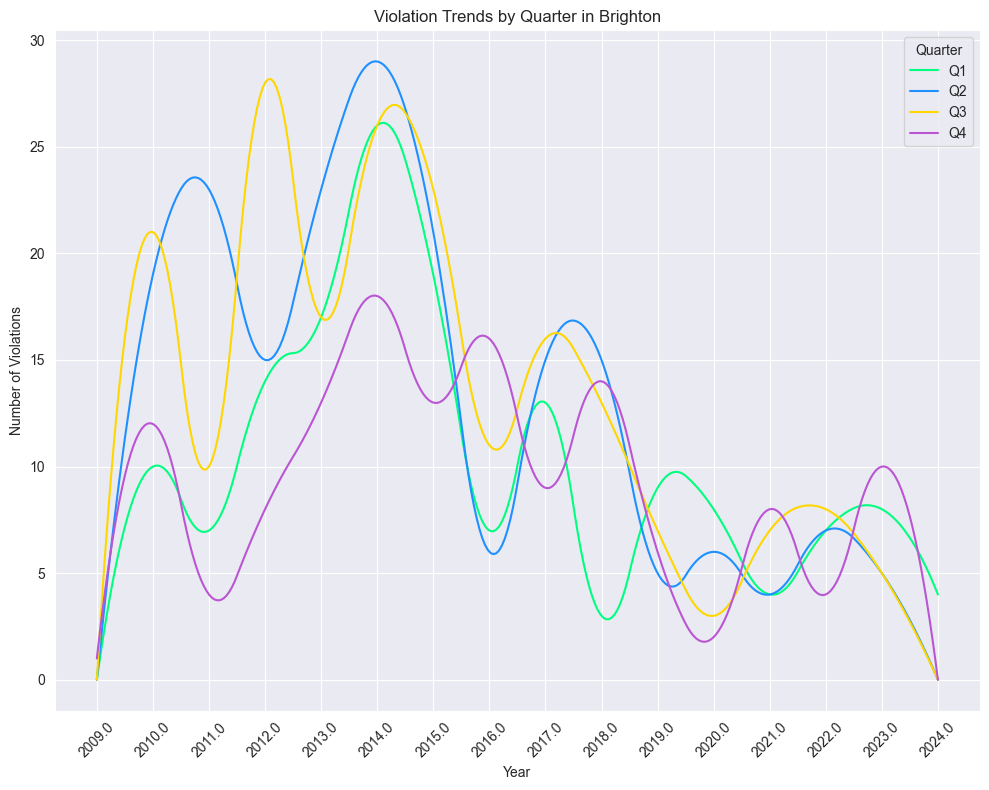

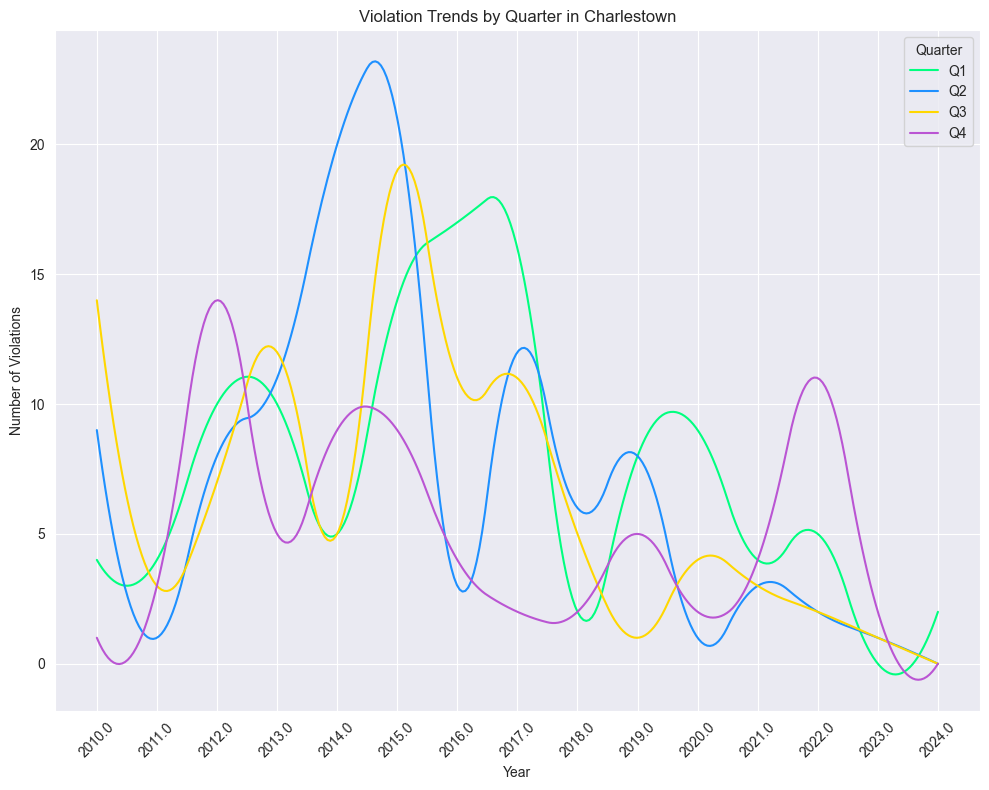

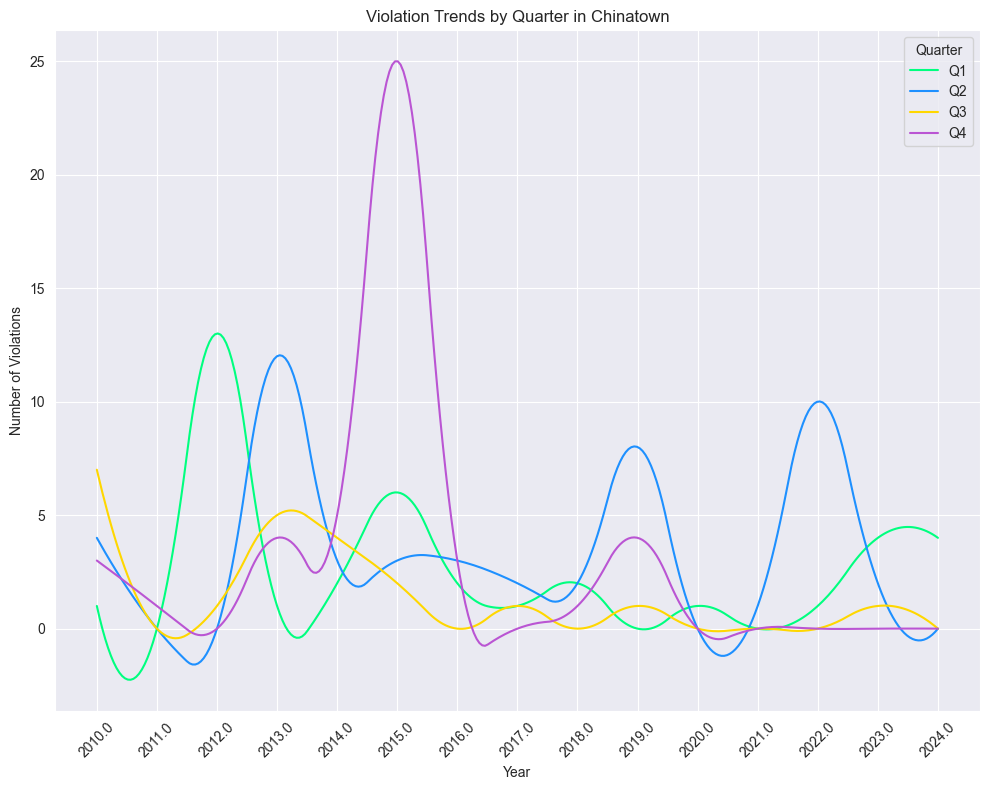

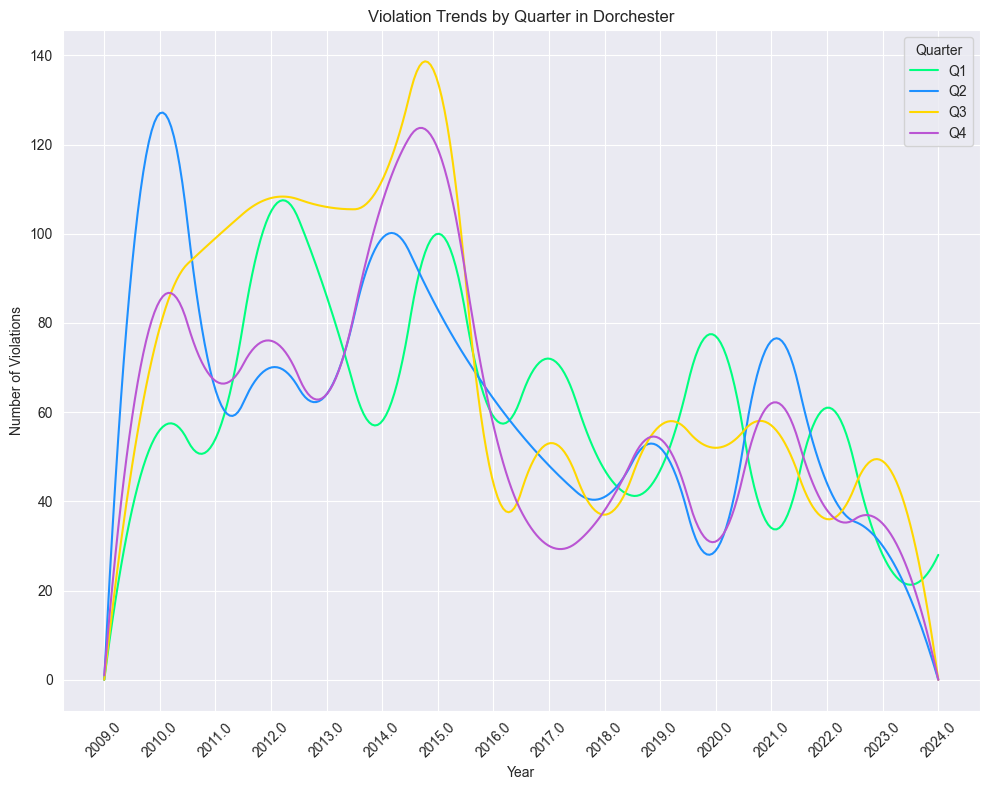

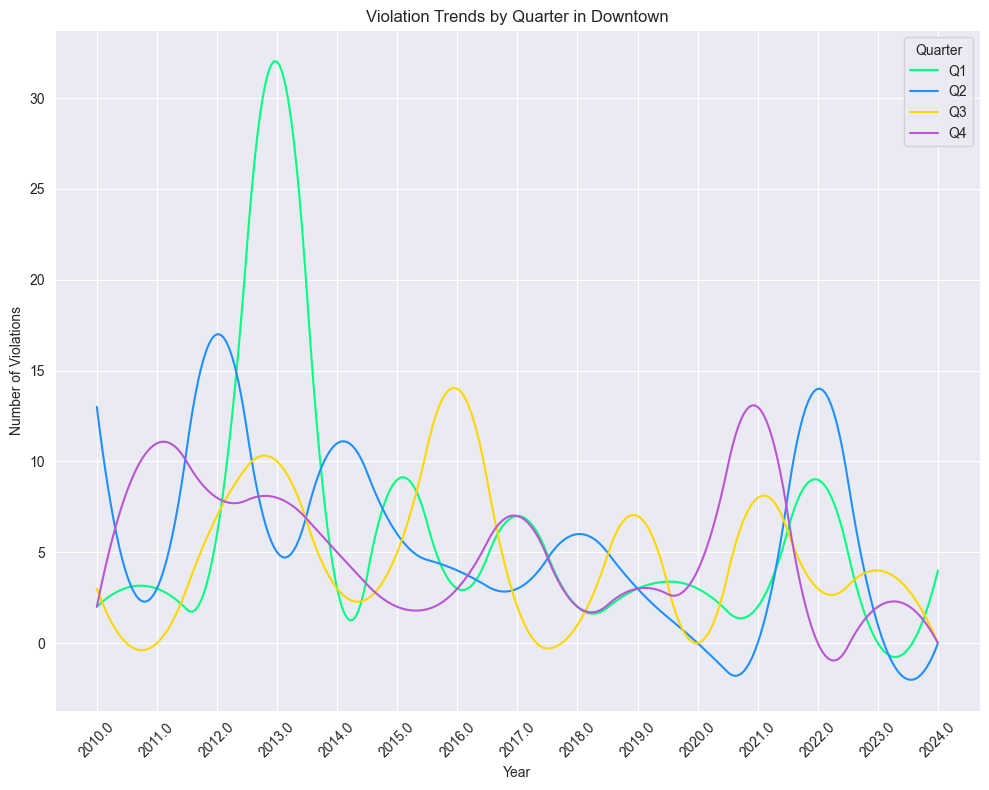

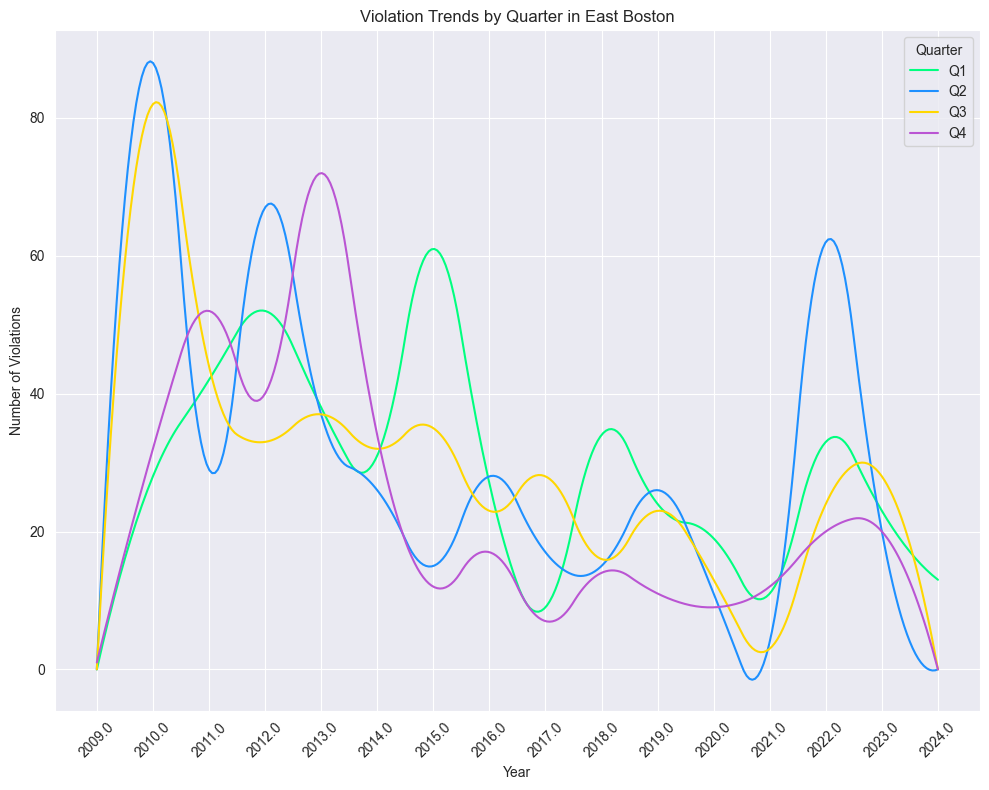

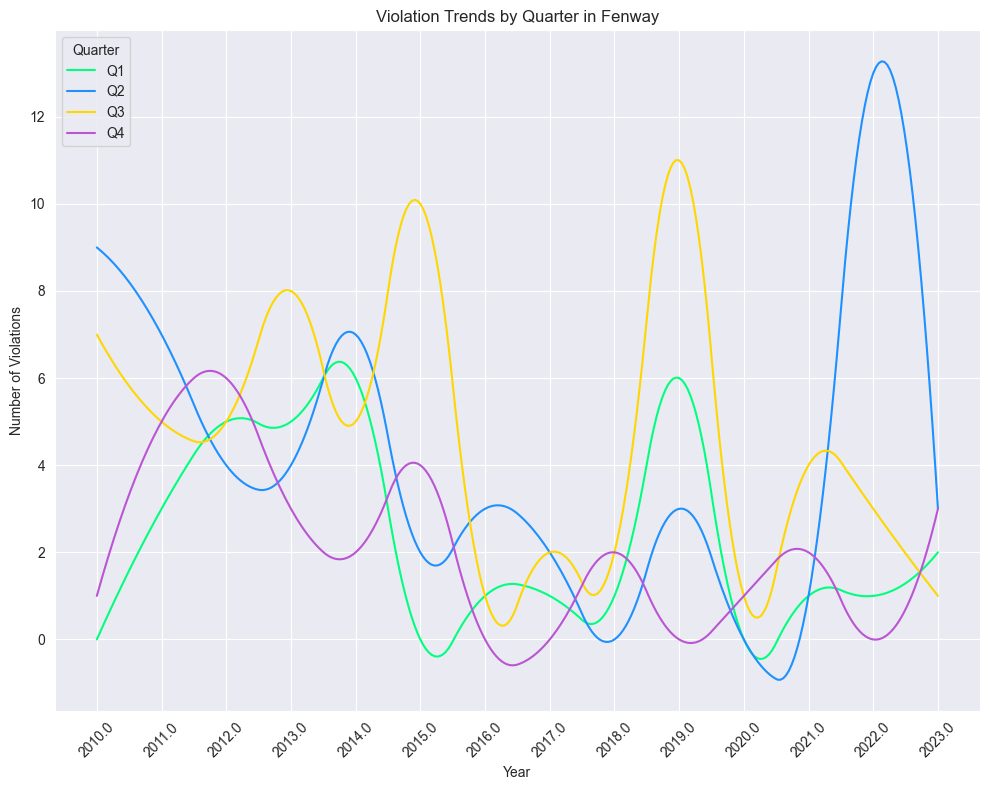

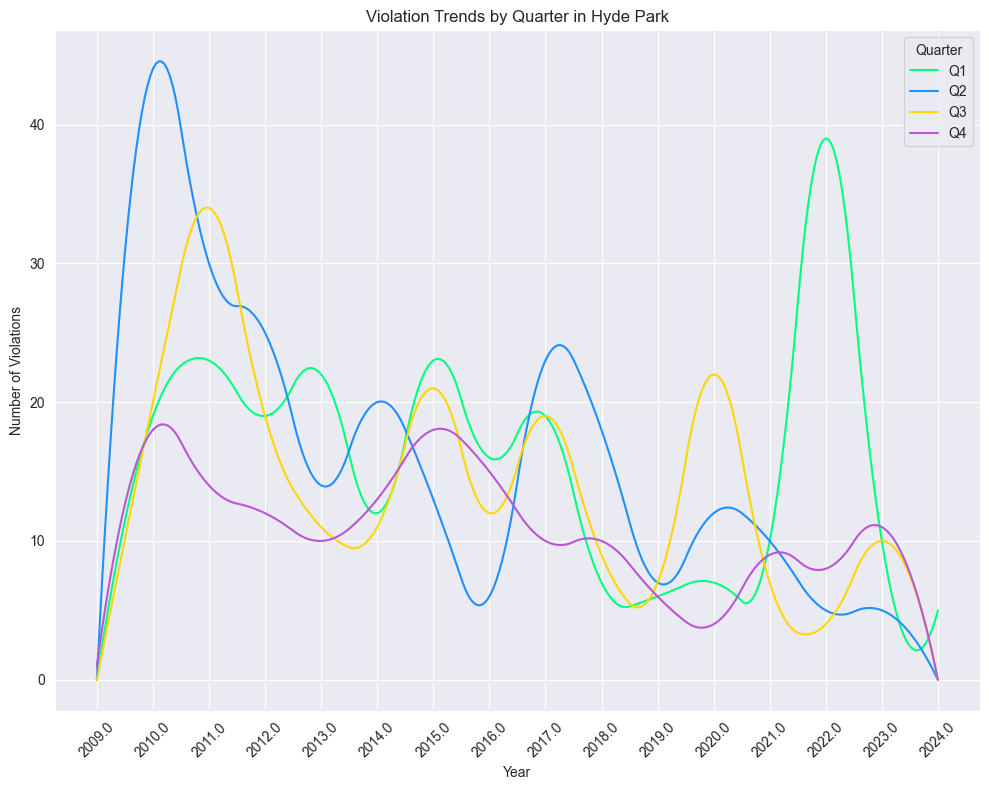

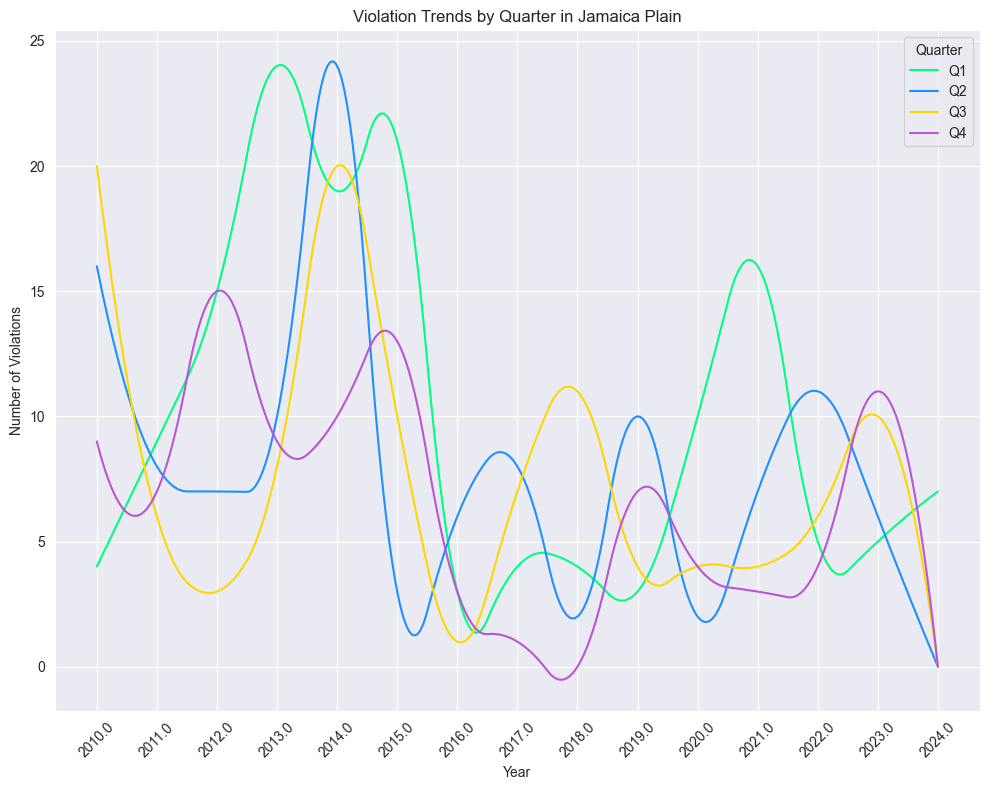

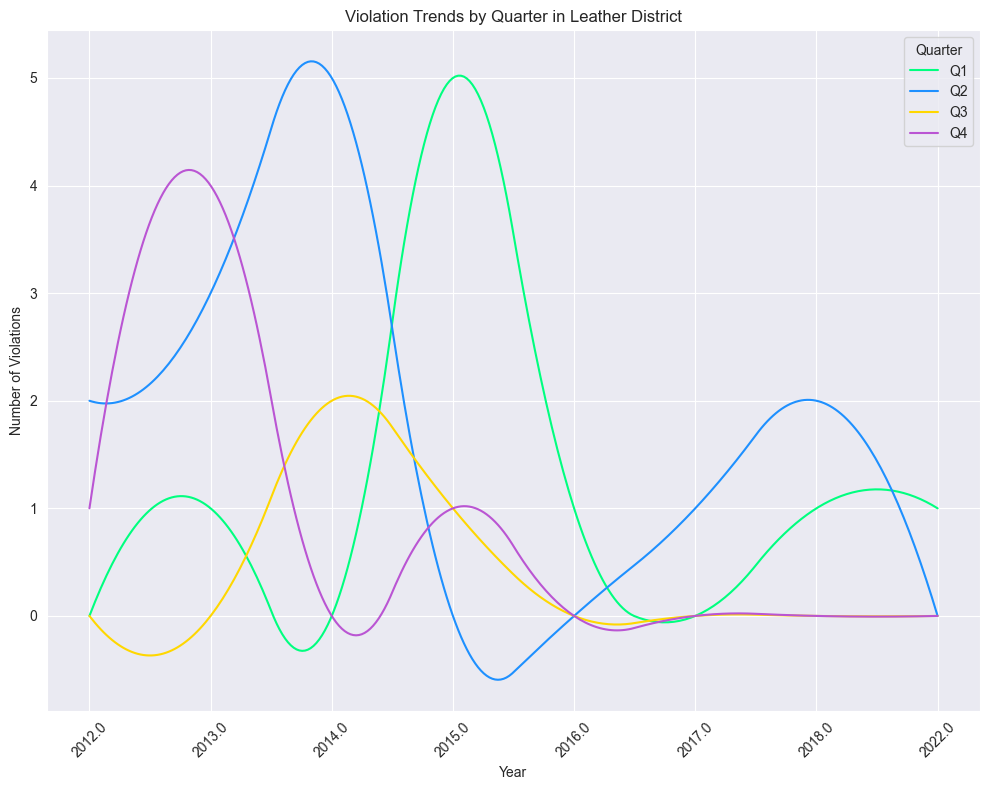

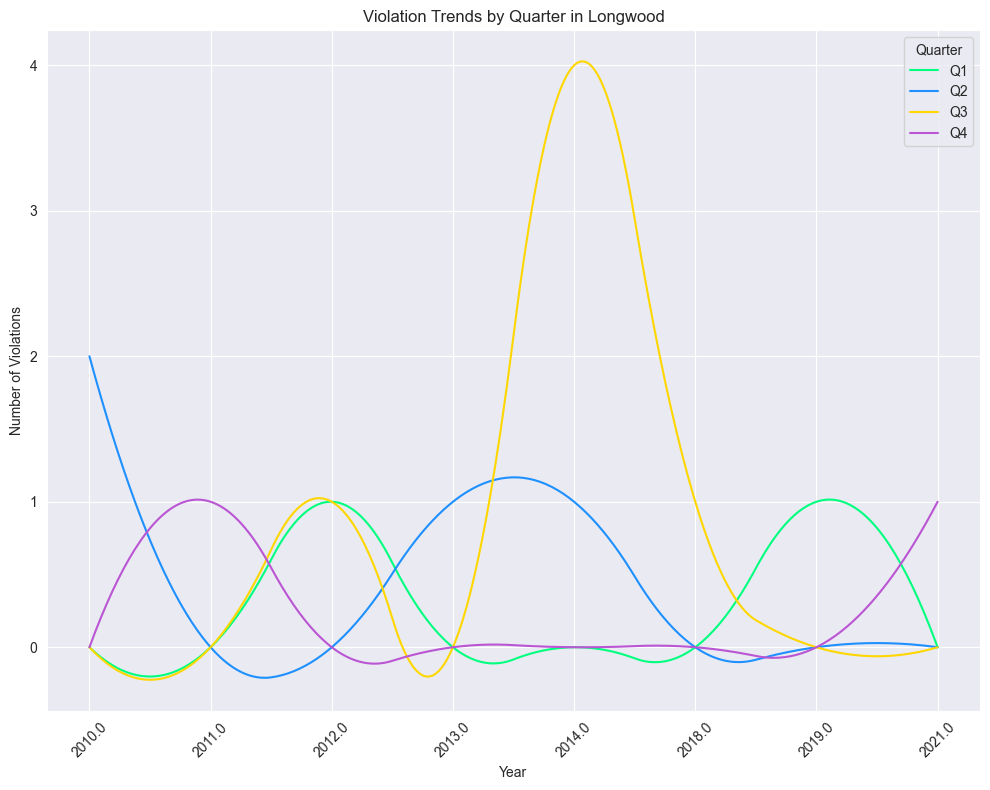

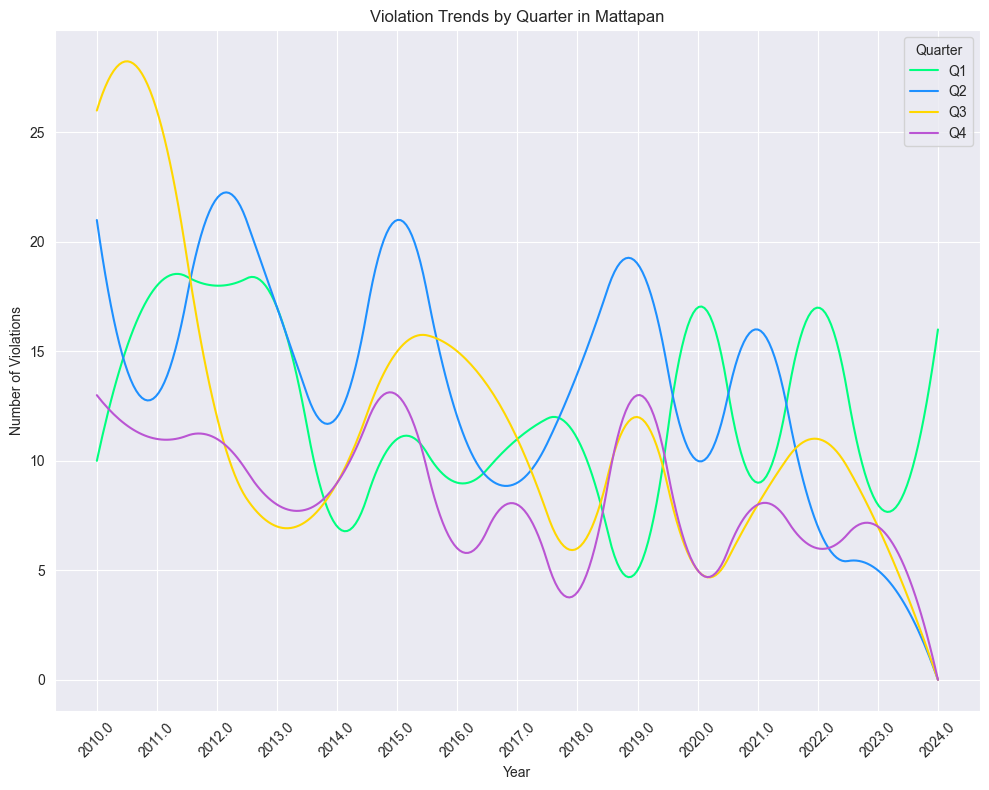

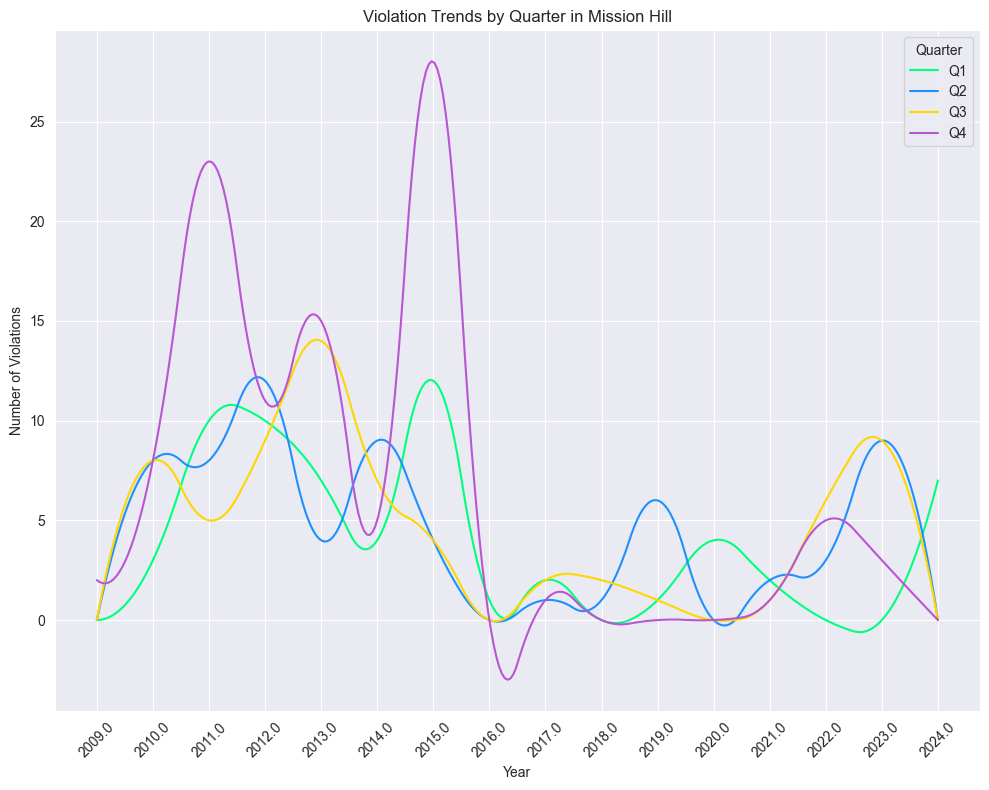

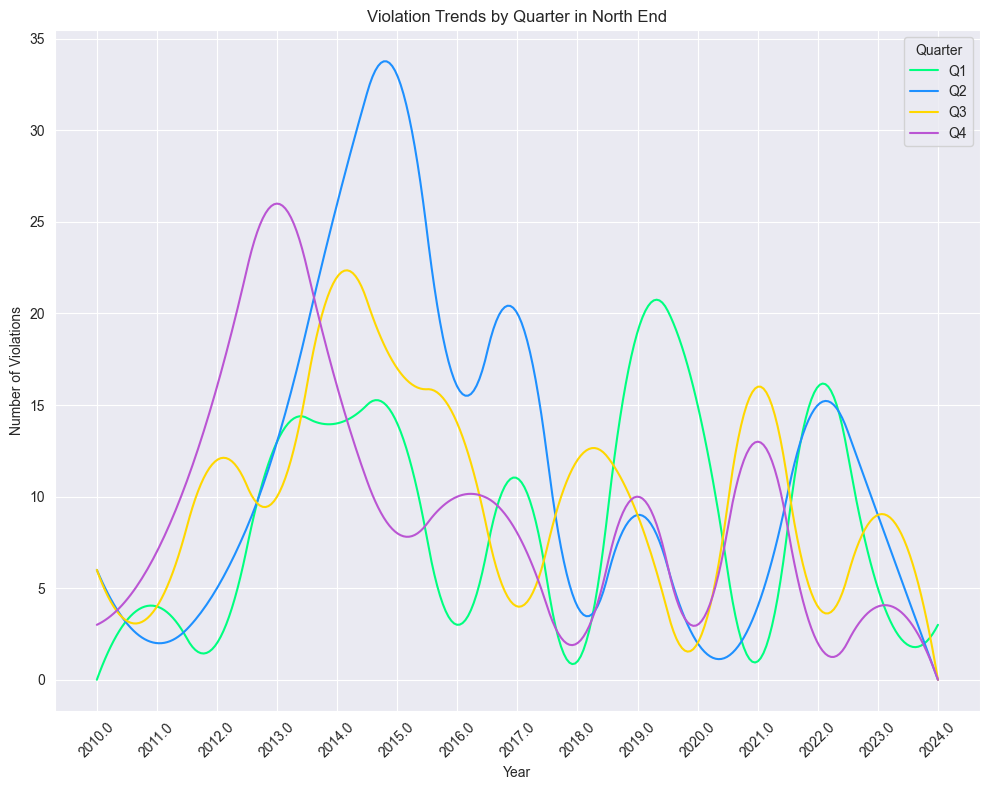

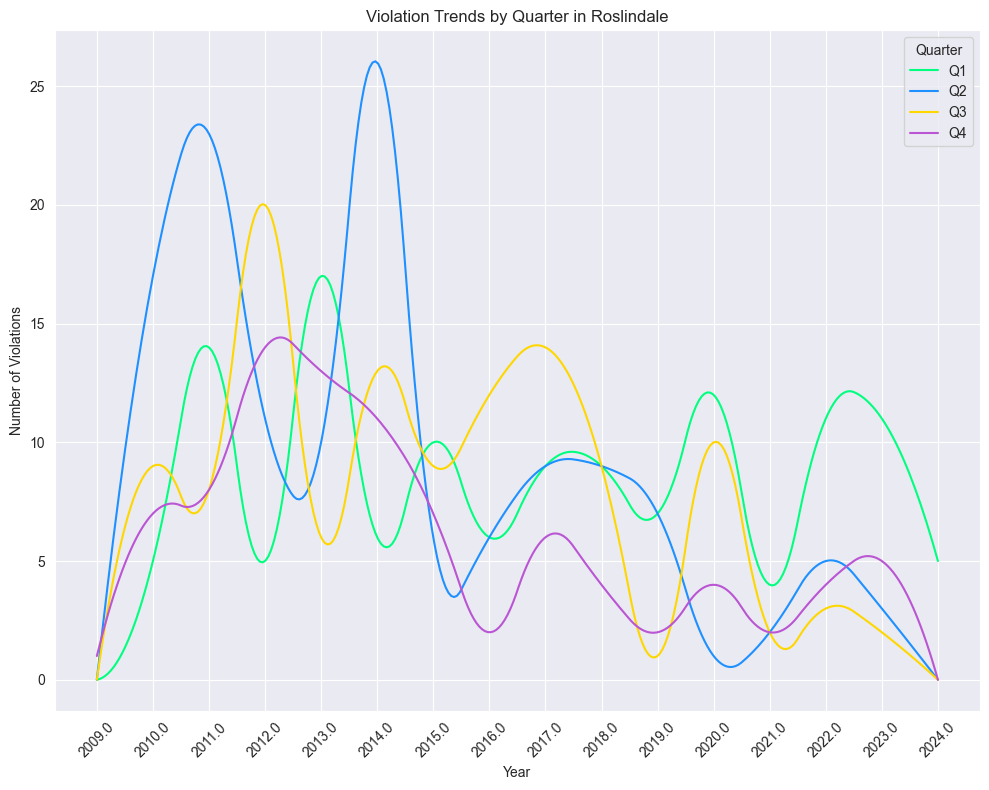

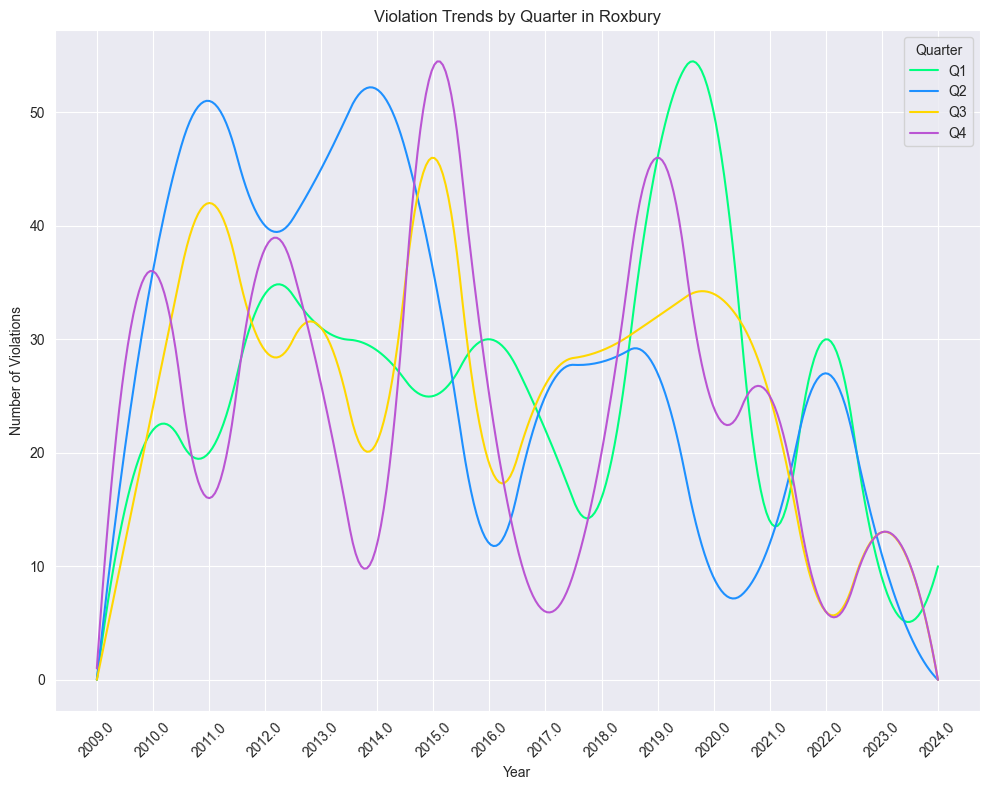

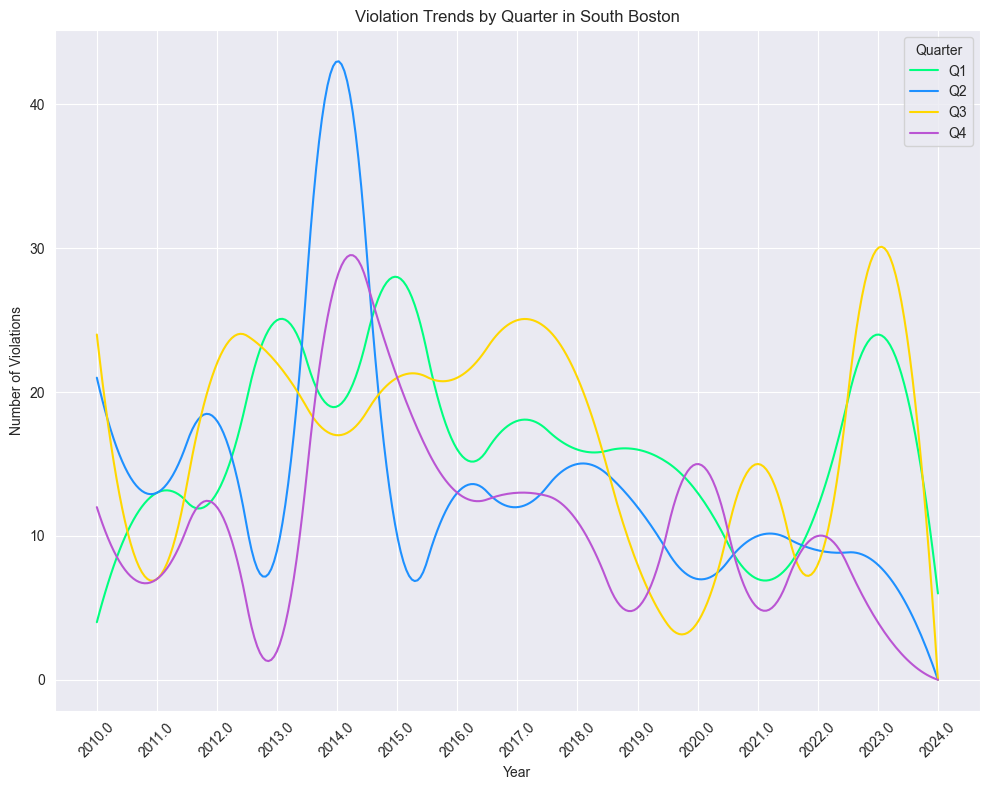

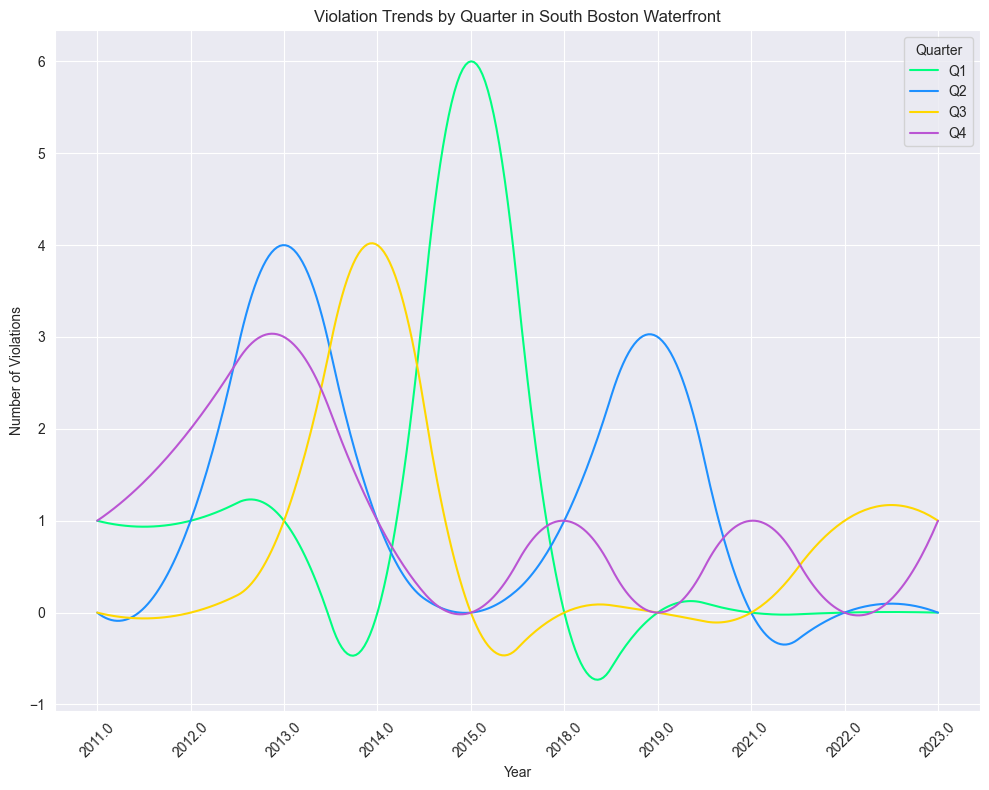

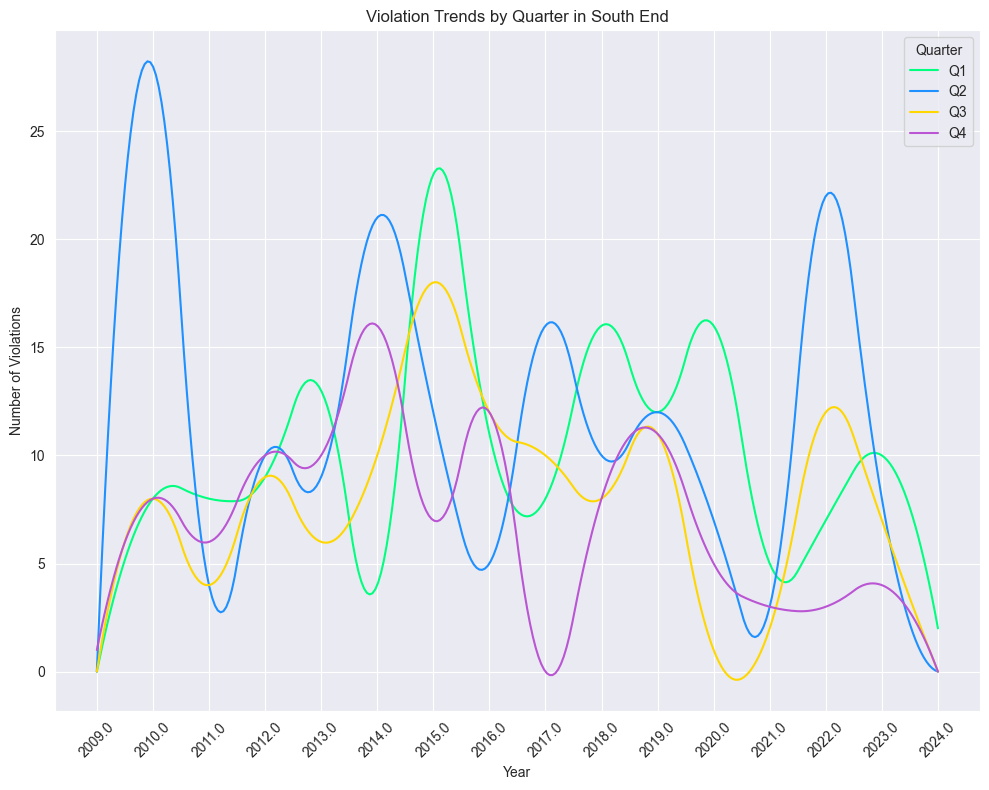

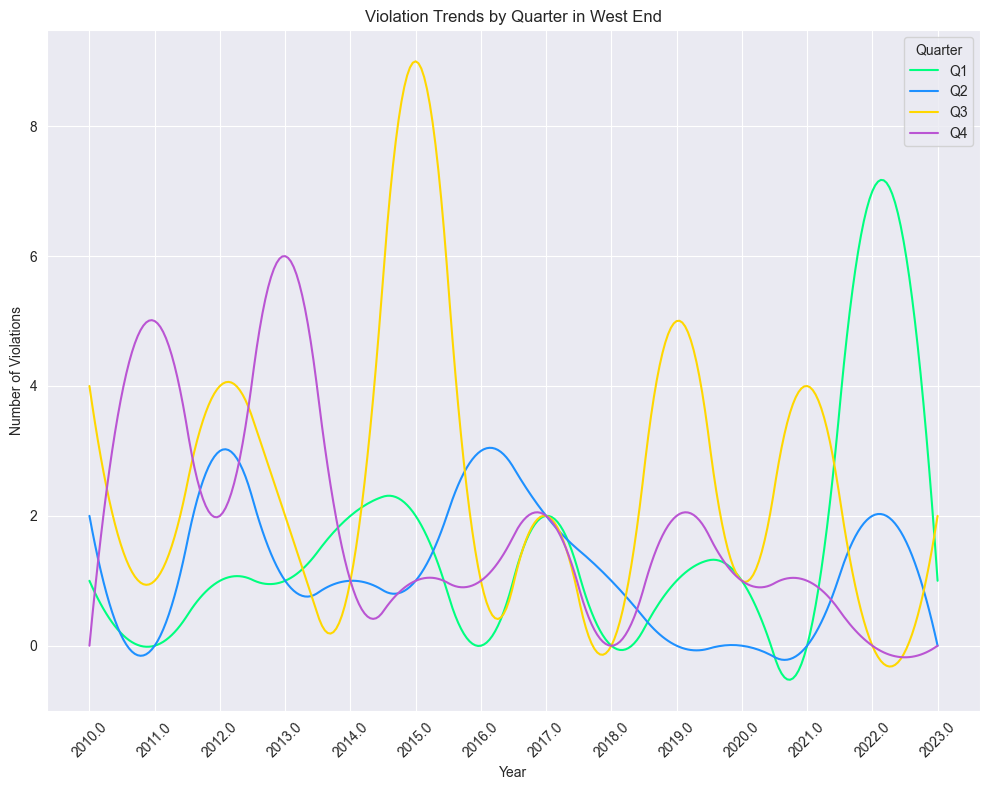

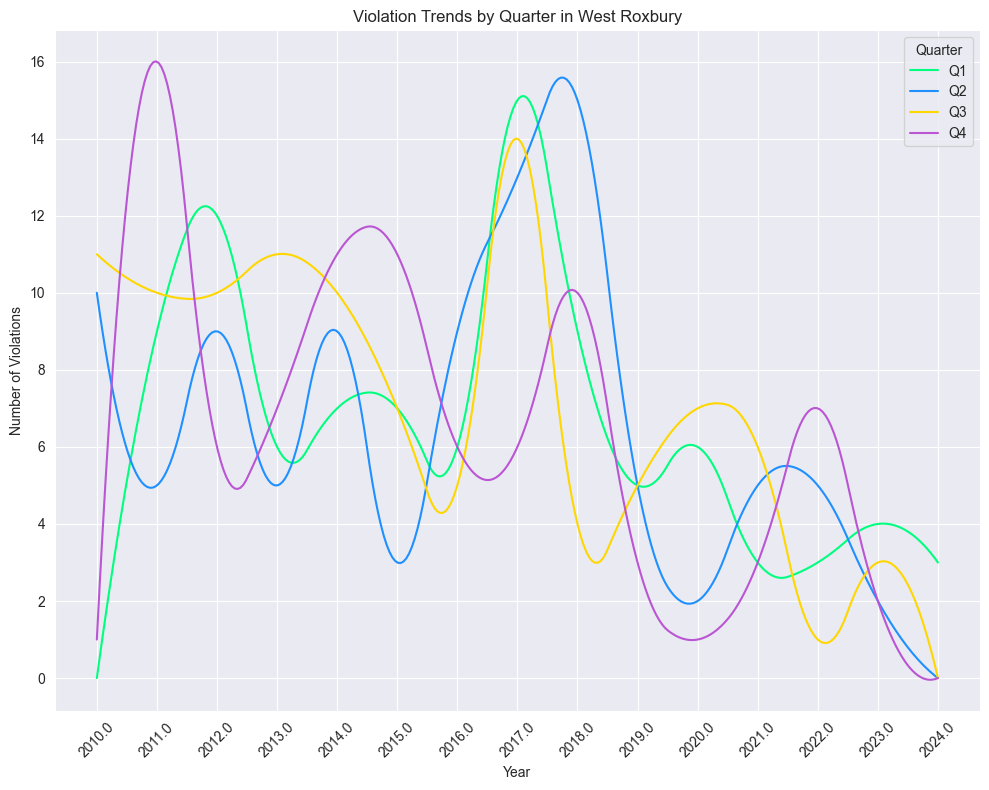

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Load the data
data_path = 'updated_PUBLIC_WORKS_VIOLATIONS.csv'
data = pd.read_csv(data_path)

# Convert 'status_dttm' to datetime and extract the 'Year' and 'Quarter'
data['status_dttm'] = pd.to_datetime(data['status_dttm'])
data['Year'] = data['status_dttm'].dt.year
data['Quarter'] = data['status_dttm'].dt.quarter

# Group the data by 'Neighborhood', 'Year', and 'Quarter' and count the violations
grouped = data.groupby(['Neighborhood', 'Year', 'Quarter']).size().reset_index(name='Violations')

# Get a sorted list of unique neighborhoods
neighborhoods = sorted(grouped['Neighborhood'].unique())

# Define a color map for the quarters
color_map = {1: 'springgreen', 2: 'dodgerblue', 3: 'gold', 4: 'mediumorchid'}

# Loop through each neighborhood to plot the data
for neighborhood in neighborhoods:
    neighborhood_group = grouped[grouped['Neighborhood'] == neighborhood]
    pivot_df = neighborhood_group.pivot(index='Year', columns='Quarter', values='Violations').fillna(0)

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the smooth trend lines for each quarter
    for quarter in range(1, 5):
        if quarter in pivot_df.columns:
            y_data = pivot_df[quarter].values
            x_data = np.linspace(0, len(y_data) - 1, num=len(y_data))

            # Create more points for a smoother curve
            xnew = np.linspace(0, len(y_data) - 1, 300)
            spl = make_interp_spline(x_data, y_data, k=2)  # A quadratic spline for a smooth curve
            y_smooth = spl(xnew)

            ax.plot(xnew, y_smooth, color=color_map[quarter], label=f'Q{quarter}')

    # Set the title and labels
    ax.set_title(f'Violation Trends by Quarter in {neighborhood}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Violations')

    # Customize the x-ticks
    plt.xticks(np.arange(len(pivot_df.index)), pivot_df.index, rotation=45)

    # Create a custom legend for quarters
    ax.legend(title='Quarter')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
